In [1]:
# Based on scikitlearn documentation
# https://scikit-learn.org/stable/auto_examples/decomposition/plot_varimax_fa.html#sphx-glr-auto-examples-decomposition-plot-varimax-fa-py

In [5]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from astropy.table import Table
from astropy.table import join

mpl.rcParams["figure.dpi"] = 100

import pandas as pd

df = pd.read_parquet('./data.parquet')
df.head()
print(np.shape(df))

#Santos et al. 2021
# san = pd.read_csv('/Users/tdavid/GitHub/rotation-ridge/data/santos2021/S21_rotators.csv')
# san = san.add_prefix('san_')

df = df.merge(san, how='left', left_on='kepid', right_on='san_KIC')

print(np.shape(df))
df = df.drop_duplicates(subset=['kepid'], keep='first')
print(np.shape(df))

len(df[np.isfinite(df['bf18_[Fe/H]'])])

from sklearn.linear_model import LinearRegression

regression_cols = []

for col in df.columns:
    if ("bf18_[" in col) & ("/H]" in col) & (col!="bf18_[M/H]"):
    #if ("bf18_[" in col):
        regression_cols.append(col)
        
        
# for col in (["p20_cks_steff",
#             "p20_cks_slogg",
#             "p20_cks_smet",
#             "p20_cks_svsini",
#             "cks_logAiso"]):

for col in (["p20_cks_steff",
            "p20_cks_slogg",
            "p20_cks_smet",
            "p20_cks_svsini",
            "p20_iso_sage"]):
                
    regression_cols.append(col)

regression_cols = np.array(regression_cols)
print(regression_cols)

data = df[regression_cols]
data.head()

data = data.dropna(subset=regression_cols) 

pd.set_option('display.max_rows', 130)
data.isna().sum()

(9750, 1371)
(9750, 1393)
(8214, 1393)
['bf18_[C/H]' 'bf18_[N/H]' 'bf18_[O/H]' 'bf18_[Na/H]' 'bf18_[Mg/H]'
 'bf18_[Al/H]' 'bf18_[Si/H]' 'bf18_[Ca/H]' 'bf18_[Ti/H]' 'bf18_[V/H]'
 'bf18_[Cr/H]' 'bf18_[Mn/H]' 'bf18_[Fe/H]' 'bf18_[Ni/H]' 'bf18_[Y/H]'
 'p20_cks_steff' 'p20_cks_slogg' 'p20_cks_smet' 'p20_cks_svsini'
 'p20_iso_sage']


bf18_[C/H]        0
bf18_[N/H]        0
bf18_[O/H]        0
bf18_[Na/H]       0
bf18_[Mg/H]       0
bf18_[Al/H]       0
bf18_[Si/H]       0
bf18_[Ca/H]       0
bf18_[Ti/H]       0
bf18_[V/H]        0
bf18_[Cr/H]       0
bf18_[Mn/H]       0
bf18_[Fe/H]       0
bf18_[Ni/H]       0
bf18_[Y/H]        0
p20_cks_steff     0
p20_cks_slogg     0
p20_cks_smet      0
p20_cks_svsini    0
p20_iso_sage      0
dtype: int64

In [178]:
import pandas as pd
pd.set_option('display.max_rows', 130)

df = pd.read_parquet('./data.parquet')
df = df.drop_duplicates(subset=['kepid'], keep='first')

regression_cols = []
error_cols = []

for col in df.columns:
    if ("bf18_[" in col) & ("/H]" in col) & (col!="bf18_[M/H]"):
        regression_cols.append(col)
    if ("bf18_e_[" in col) & ("/H]" in col) & (col!="bf18_e_[M/H]"):
        error_cols.append(col)        
        
for col in (["p20_cks_steff",
            "p20_cks_slogg",
            "p20_cks_smet",
            "p20_cks_svsini",
            "p20_iso_sage"]):
                
    regression_cols.append(col)
    
    
#For the time being...    
# for col in (["p20_cks_steff_err1","p20_cks_steff_err2", 
#             "p20_cks_slogg_err1","p20_cks_slogg_err2",
#             "p20_cks_smet_err1","p20_cks_smet_err2",
#             "p20_cks_svsini_err1","p20_cks_svsini_err2",
#             "p20_iso_sage_err1","p20_iso_sage_err2"]):

for col in (["p20_cks_steff_err1", 
            "p20_cks_slogg_err1",
            "p20_cks_smet_err1",
            "p20_cks_svsini_err1",
            "p20_iso_sage_err1"]):

    error_cols.append(col)
    

all_cols = np.append(regression_cols, error_cols)    
    
regression_cols = np.array(regression_cols)
error_cols = np.array(error_cols)

data_werr = df[all_cols]
data_werr = data_werr.dropna(subset=all_cols) 
data_werr.isna().sum()


data = data_werr[regression_cols]
errors = data_werr[error_cols]

data.head()


data.to_csv('/Users/tdavid/Desktop/lvm-test-data.csv', index=False)
errors.to_csv('/Users/tdavid/Desktop/lvm-test-errors.csv', index=False)

In [175]:
errors.head()

,bf18_e_[C/H],bf18_e_[N/H],bf18_e_[O/H],bf18_e_[Na/H],bf18_e_[Mg/H],bf18_e_[Al/H],bf18_e_[Si/H],bf18_e_[Ca/H],bf18_e_[Ti/H],bf18_e_[V/H],bf18_e_[Cr/H],bf18_e_[Mn/H],bf18_e_[Fe/H],bf18_e_[Ni/H],bf18_e_[Y/H],p20_cks_steff_err1,p20_cks_slogg_err1,p20_cks_smet_err1,p20_cks_svsini_err1,p20_iso_sage_err1
0,0.04,0.11,0.08,0.04,0.03,0.06,0.03,0.03,0.03,0.05,0.02,0.04,0.02,0.02,0.05,60.0,0.1,0.04,1.0,3.371801
5,0.05,0.14,0.10,0.06,0.04,0.07,0.04,0.04,0.04,0.06,0.03,0.05,0.03,0.03,0.07,60.0,0.1,0.04,1.0,1.794833
9,0.05,0.13,0.09,0.05,0.03,0.07,0.03,0.04,0.03,0.06,0.03,0.05,0.02,0.03,0.06,60.0,0.1,0.04,1.0,5.624011
10,0.03,0.08,0.06,0.03,0.02,0.04,0.02,0.03,0.02,0.04,0.02,0.03,0.02,0.02,0.04,60.0,0.1,0.04,1.0,2.041346
11,0.03,0.06,0.05,0.02,0.02,0.04,0.02,0.02,0.02,0.04,0.02,0.03,0.01,0.02,0.04,60.0,0.1,0.04,1.0,0.380487


In [176]:
Y = np.array(data)
Yerr = np.array(errors)

print(np.shape(Y), np.shape(Yerr))

(928, 20) (928, 20)


In [163]:
df['p20_iso_sage_err1']

0       3.371801
2            NaN
3            NaN
4            NaN
5       1.794833
          ...   
9745         NaN
9746         NaN
9747         NaN
9748         NaN
9749         NaN
Name: p20_iso_sage_err1, Length: 8214, dtype: float64

In [157]:
data.to_csv('/Users/tdavid/Desktop/lvm-test-data.csv', index=False)

In [7]:
from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

In [9]:
X = StandardScaler().fit_transform(data)
#X = StandardScaler().fit_transform(data["data"])
#feature_names = data["feature_names"]

array([[-0.        , -0.02      ,  0.08      , ...,  0.102     ,
         0.8       ,  7.94328235],
       [ 0.08      , -0.24      ,  0.09      , ...,  0.177     ,
         2.6       ,  9.12010839],
       [ 0.32      , -0.44      ,  0.48      , ...,  0.062     ,
         2.1       ,  5.88843655],
       ...,
       [-0.34      , -0.22      , -0.28      , ..., -0.413     ,
         0.9       ,  8.91250938],
       [ 0.05      , -0.        ,  0.08      , ...,  0.086     ,
         3.8       ,  6.42687717],
       [-0.34      , -0.49      , -0.2       , ..., -0.39      ,
         0.        ,  9.33254301]])

In [35]:
feature_names = list(data.columns)
feature_names

['bf18_[C/H]',
 'bf18_[N/H]',
 'bf18_[O/H]',
 'bf18_[Na/H]',
 'bf18_[Mg/H]',
 'bf18_[Al/H]',
 'bf18_[Si/H]',
 'bf18_[Ca/H]',
 'bf18_[Ti/H]',
 'bf18_[V/H]',
 'bf18_[Cr/H]',
 'bf18_[Mn/H]',
 'bf18_[Fe/H]',
 'bf18_[Ni/H]',
 'bf18_[Y/H]',
 'p20_cks_steff',
 'p20_cks_slogg',
 'p20_cks_smet',
 'p20_cks_svsini',
 'p20_iso_sage']

<ipython-input-37-7dca81f83e73>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list(feature_names), rotation=90)
<ipython-input-37-7dca81f83e73>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(list(feature_names))


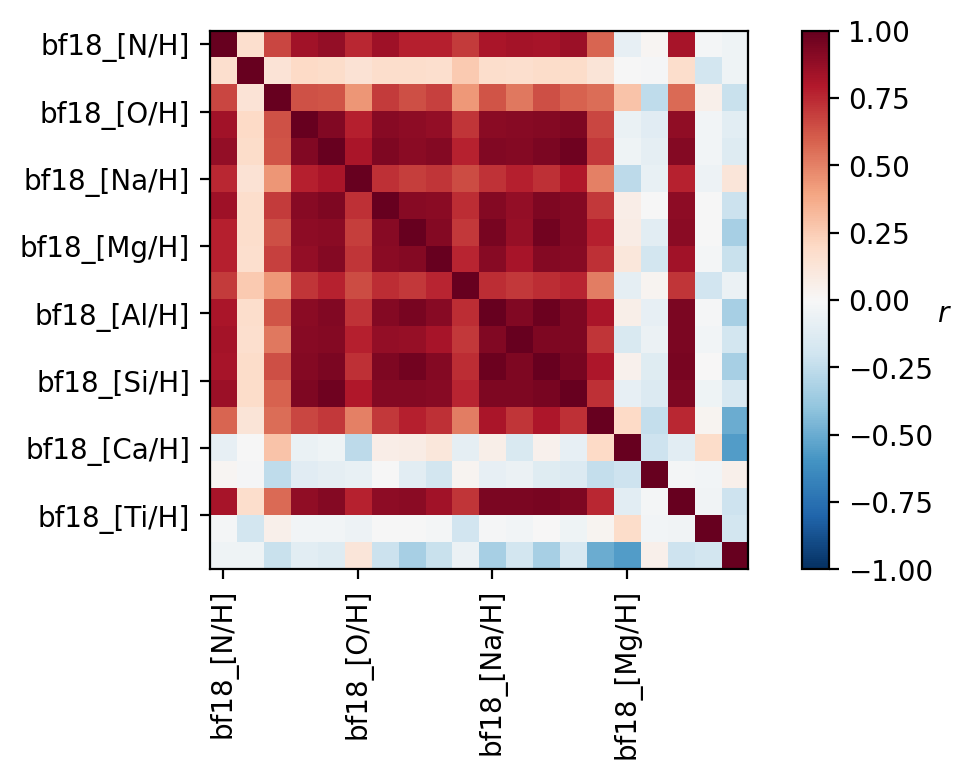

In [37]:
ax = plt.axes()

im = ax.imshow(np.corrcoef(X.T), cmap="RdBu_r", vmin=-1, vmax=1)

#ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(list(feature_names), rotation=90)
#ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels(list(feature_names))

plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)
plt.tight_layout()



 PCA :

(20, 5)
[[ 3.23235985e-05 -3.02945975e-05 -1.10131549e-02 -2.10112397e-02
  -2.21507511e-01]
 [ 1.38867557e-05 -1.77374651e-02 -9.63263359e-02 -9.90609697e-01
   9.43954074e-02]
 [-1.21692654e-04 -4.62824025e-05 -8.03039369e-03 -1.82957075e-02
  -1.86846776e-01]
 [ 3.71897123e-05 -1.88250006e-04 -2.22802739e-02 -3.11249539e-02
  -3.19345828e-01]
 [ 1.57875101e-05 -2.19007660e-04 -1.55771580e-02 -1.98349907e-02
  -2.22540978e-01]
 [ 1.36227503e-04 -9.11677533e-05 -6.10617471e-03 -2.49359946e-02
  -2.81055284e-01]
 [-2.38440384e-05 -1.46086069e-04 -1.87100043e-02 -1.90714823e-02
  -2.28048280e-01]
 [-3.10617300e-05 -2.03014995e-04 -3.02219790e-02 -1.81814945e-02
  -2.31660201e-01]
 [-3.85031885e-05 -3.90185138e-04 -1.55438836e-02 -1.69010934e-02
  -2.04719772e-01]
 [ 4.10886788e-05 -2.24854181e-03 -1.66902616e-02 -3.13116598e-02
  -2.20036434e-01]
 [-2.61783742e-05 -2.71614578e-04 -3.43823244e-02 -1.95785841e-02
  -2.57240259e-01]
 [ 9.45579031e-05  7.27051193e-05 -4.40881576e-

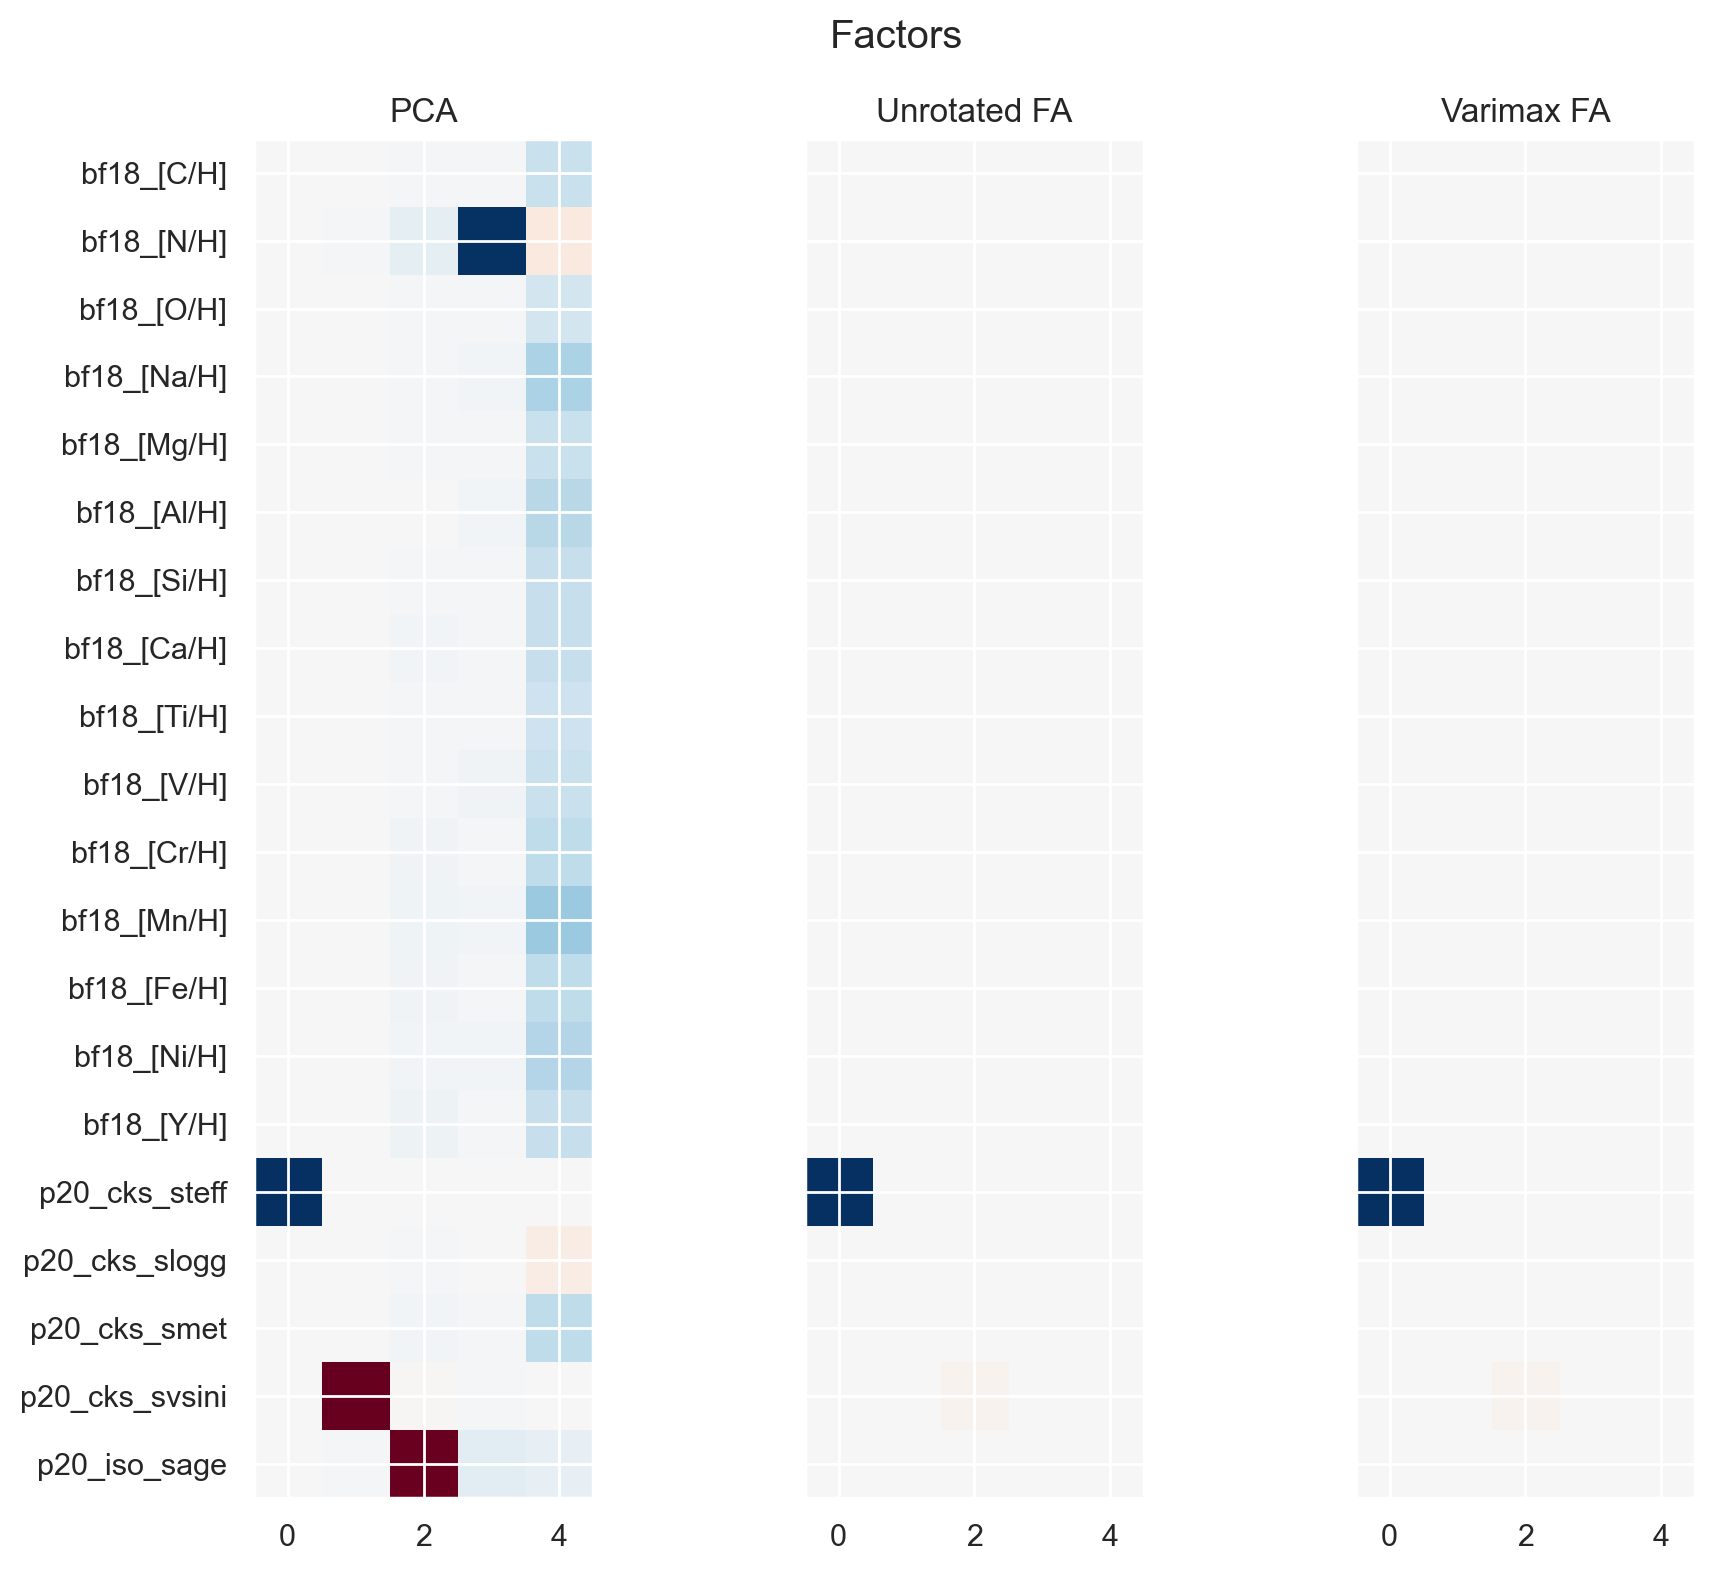

In [145]:
n_comps = 5

# methods = [
#     ("PCA", PCA()),
#     ("Unrotated FA", FactorAnalysis()),
#     ("Varimax FA", FactorAnalysis(rotation="varimax")),
# ]

methods = [
    ("PCA", PCA()),
    ("Unrotated FA", FactorAnalysis()),
    ("Varimax FA", FactorAnalysis(rotation="varimax")),
]

fig, axes = plt.subplots(ncols=len(methods), figsize=(10, 8))

for ax, (method, fa) in zip(axes, methods):
    fa.set_params(n_components=n_comps)
    #fa.fit(X)
    fa.fit(Y)
    

    components = fa.components_.T
    print("\n\n %s :\n" % method)
    print(np.shape(components))
    print(components)

    vmax = np.abs(components).max()
    ax.imshow(components, cmap="RdBu_r", vmax=vmax, vmin=-vmax)
    ax.set_yticks(np.arange(len(feature_names)))
    if ax.is_first_col():
        ax.set_yticklabels(feature_names)
    else:
        ax.set_yticklabels([])
    ax.set_title(str(method))
    #ax.set_xticks([0, 1, 2, 3, 4])
    #ax.set_xticklabels(["Comp. 1", "Comp. 2", "Comp. 3", "Comp. 4", "Comp. 5"])
fig.suptitle("Factors")
plt.tight_layout()
plt.show()

In [132]:
np.shape(components)

(20, 5)

Before you perform factor analysis, you need to evaluate the “factorability” of our dataset. Factorability means "can we found the factors in the dataset?". There are two methods to check the factorability or sampling adequacy:

1. Bartlett’s Test
2. Kaiser-Meyer-Olkin Test

Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, you should not employ a factor analysis.

In [43]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(data)
chi_square_value, p_value

(29921.21800713286, 0.0)

Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable. Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.

In [45]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(data)
kmo_model

0.9380099405370335

Choosing the Number of Factors
For choosing the number of factors, you can use the Kaiser criterion and scree plot. Both are based on eigenvalues.

In [55]:
for col in data.columns:
    print(col)

bf18_[C/H]
bf18_[N/H]
bf18_[O/H]
bf18_[Na/H]
bf18_[Mg/H]
bf18_[Al/H]
bf18_[Si/H]
bf18_[Ca/H]
bf18_[Ti/H]
bf18_[V/H]
bf18_[Cr/H]
bf18_[Mn/H]
bf18_[Fe/H]
bf18_[Ni/H]
bf18_[Y/H]
p20_cks_steff
p20_cks_slogg
p20_cks_smet
p20_cks_svsini
p20_iso_sage


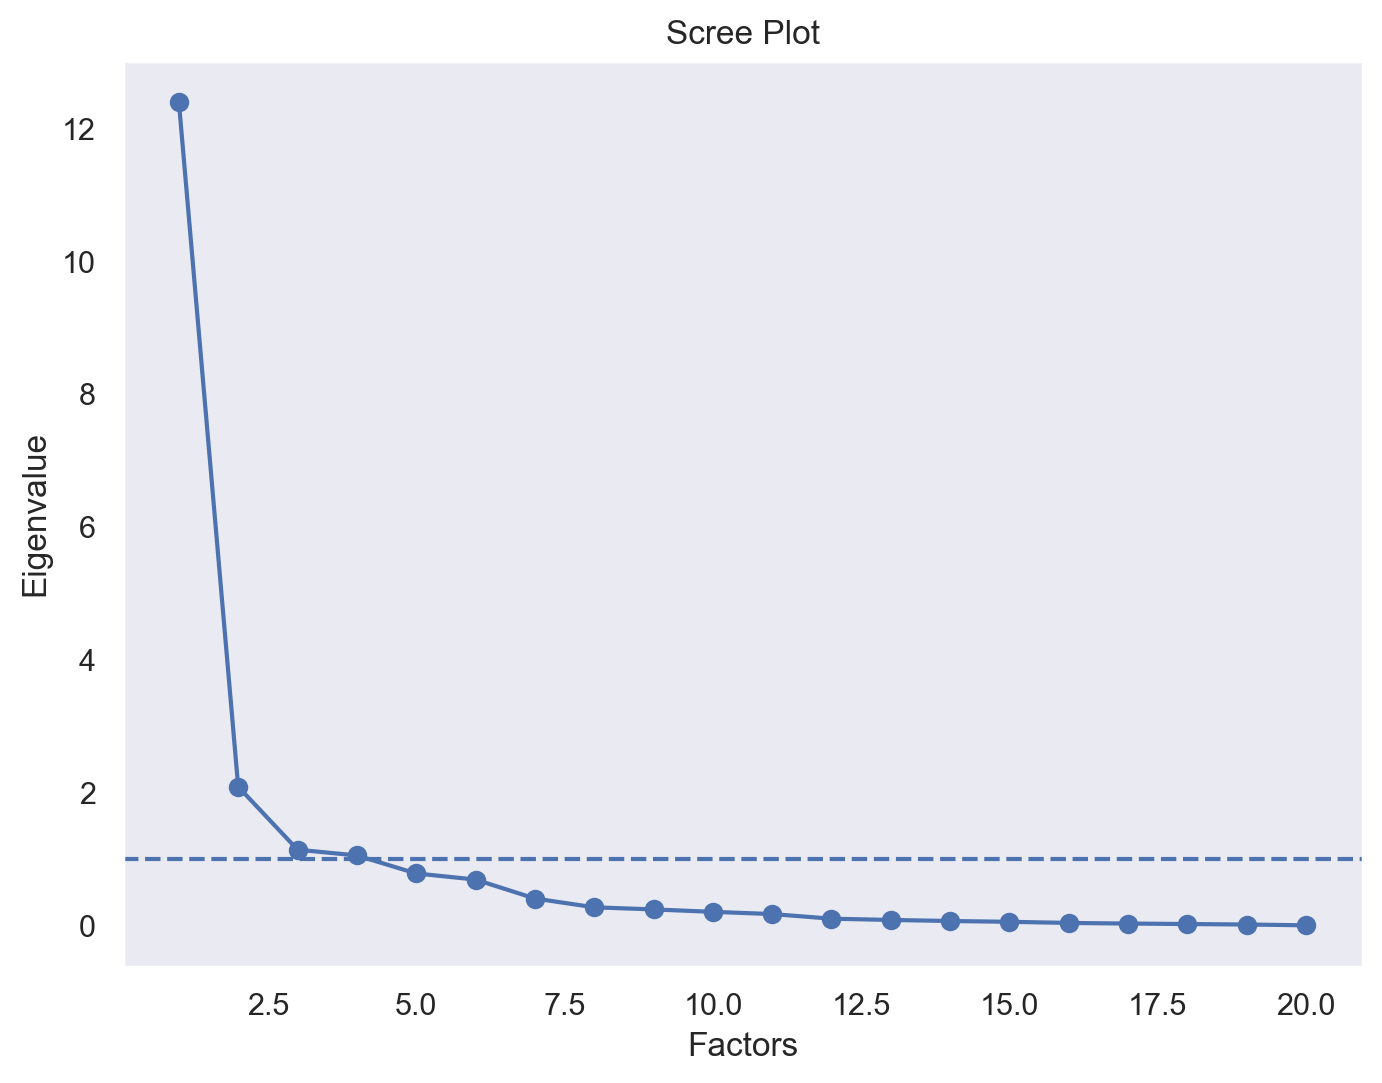

In [97]:
from factor_analyzer import FactorAnalyzer

# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(data)
eigen_values, vectors = fa.get_eigenvalues()

plt.scatter(range(1,data.shape[1]+1),eigen_values)
plt.plot(range(1,data.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.axhline(1, ls='--')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [98]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.set_params(n_factors=5, rotation="varimax")
fa.fit(data)
loadings = fa.loadings_

loadings

array([[ 8.74946271e-01, -9.27929949e-02,  7.38384209e-02,
         6.29967025e-02,  2.25627106e-01],
       [ 1.47792153e-01,  4.14732928e-02,  1.38021144e-04,
         3.58619829e-01,  4.01948038e-02],
       [ 6.20476916e-01,  2.08351737e-01, -1.73168308e-01,
        -6.98595845e-04,  4.62228787e-01],
       [ 9.38868866e-01, -2.87569137e-02, -6.04889211e-02,
         9.66753717e-02,  9.73887137e-02],
       [ 9.66892300e-01, -1.05862848e-02, -3.51086850e-02,
         1.13252565e-01,  9.90714738e-02],
       [ 8.14425469e-01, -2.82498684e-01, -4.43833554e-02,
         8.48160723e-02,  7.30369574e-03],
       [ 9.36453117e-01,  1.10582487e-01,  6.59158559e-02,
         8.31570431e-02,  2.11638363e-01],
       [ 9.25347560e-01,  2.23118337e-01, -3.74696483e-02,
         1.01695479e-01,  3.38526085e-02],
       [ 8.97756795e-01,  1.44991925e-01, -1.15142324e-01,
         1.55290334e-01,  1.88245523e-01],
       [ 7.30742971e-01, -2.36321751e-02,  6.66668213e-02,
         4.25236758e-01

In [76]:
loadings_df = pd.DataFrame(loadings)
loadings_df.head(np.shape(loadings)[0])

,0,1,2,3,4,5
0,0.849881,-0.092973,0.081198,0.295923,0.073199,0.012344
1,0.147103,0.039128,0.002118,0.046578,0.355945,0.010450
2,0.549711,0.209406,-0.152692,0.757816,0.038130,0.007860
3,0.929606,-0.029542,-0.058515,0.161492,0.089453,0.013327
4,0.967163,-0.007403,-0.036667,0.122958,0.091215,0.080184
5,0.814464,-0.284563,-0.047345,0.060847,0.069588,0.021904
6,0.924293,0.115536,0.068488,0.231102,0.073872,0.083097
7,0.922797,0.220885,-0.036539,0.097879,0.091518,-0.010412
8,0.903397,0.158403,-0.118278,0.153018,0.122666,0.198417
9,0.744472,-0.016351,0.063151,0.033883,0.399079,0.162586


In [99]:
np.shape(loadings)

(20, 5)

In [77]:
# Get variance of each factors
fa.get_factor_variance()

(array([11.74257234,  1.76748047,  1.10000646,  0.88447192,  0.69061507,
         0.28864124]),
 array([0.58712862, 0.08837402, 0.05500032, 0.0442236 , 0.03453075,
        0.01443206]),
 array([0.58712862, 0.67550264, 0.73050296, 0.77472656, 0.80925731,
        0.82368937]))

In [81]:
from warnings import filterwarnings
#from aesara import tensor as at
import aesara_theano_fallback.tensor as at
import arviz as az
from matplotlib import pyplot as plt
import numpy as np
import pymc3 as pm
import pymc3_ext as pmx
import seaborn as sns

filterwarnings('ignore', category=RuntimeWarning, module='arviz')
filterwarnings('ignore', category=UserWarning, module='arviz')
filterwarnings('ignore', category=UserWarning, module='pandas')

plt.rcParams['figure.figsize'] = (8, 6)
sns.set(color_codes=True)

In [78]:
# SEED = 123456789 # for reproducibility

# rng = np.random.default_rng(SEED)

# # The observed predictors, 𝐱𝑖, will be 5-dimensional vectors with entries drawn 
# # i.i.d. from the standard normal distribution. We generate 100 such vectors.

# N = 100 #Size of sample
# K = 5 #Dimensionality of latent variable vector
# X = rng.normal(size=(N, K))


# # The observed targets, 𝐲𝑖, will be 10-dimensional vectors.
# # The constant term for this model, 𝐵0, is therefore a random vector in ℝ10 whose entries are i.i.d. drawn from the uniform distribution on [−3,3].

# M = 10 #Dimensionality of observed targets

# B0 = rng.uniform(-3., 3., size=M)

# # The component slopes form a 10×5 dimensional matrix. 
# # We generate a somewhat sparse matrix that has only (approximately) 50% of entries nonzero. 
# # These entries are also i.i.d. from the uniform distribution on [−3,3].

# B = np.zeros((M, K))
# P_nonzero = 0.5

# is_nonzero = np.random.binomial(1, P_nonzero, size=(M, K)) == 1
# B[is_nonzero] = rng.uniform(-3., 3., size=is_nonzero.sum())

# #The observations before noise are
# #𝐲noiseless𝑖=𝐵0+𝐵 𝐱𝑖.

# Y_noiseless = B0 + X.dot(B.T)

# #So far this is a fairly standard simulation from a linear regression model. Things start to get more interesting when we introduce a non-diagonal correlation structure to the noise using latent factors. The noise added to the 𝑗-th component of the 𝑖-th sample is

# #𝜀𝑖,𝑗=𝐰𝑗⋅𝐳𝑖+𝜎𝑖,𝑗

# #where 𝐰1,⋯𝐰10, and 𝐳1,…,𝐳100 are vectors in ℝ2 whose entries are drawn i.i.d. from a standard normal distribution. Here two is the number of latent factors that govern the covariance structure. The uncorrelated noise is drawn i.i.d. from a normal distribution with variance (0.25)2.

# F = 2 #Number of latent factors that govern the covariance structure

# S_SCALE = 1.

# W = rng.normal(size=(M, F))
# Z = rng.normal(size=(N, F))

# S = rng.normal(scale=S_SCALE, size=(N, M))

# Y = Y_noiseless + Z.dot(W.T) + S

# fig, axes = plt.subplots(nrows=M, ncols=K,
#                          sharex=True, sharey=True,
#                          figsize=(20, 20))

# for j, row_axes in enumerate(axes):
#     for i, ax in enumerate(row_axes):
#         ax.scatter(X[:, i], Y[:, j], alpha=0.5);

#         ax.set_xlabel(f"$x_{{{i + 1}}}$");
#         ax.set_ylabel(f"$y_{{{j + 1}}}$");

# fig.tight_layout();

#DFM
#Decompose data matrix into outer product of narrow tall and short/wide matrix
#each row in skinny matrix is how much each star projects into each latent space/variable
#short matrix, each column is how much each element projects into latent space

#Get rid of mean model (mu)
#rewrite inverse variance instead of sigma (if Y missing some values)
#if you put zeros in inverse sigma where Y is missing measurements, you end up with posterior estimates
#test: trying zero-ing out certain elements and predicting them
#write in terms of precision instead of std dev, tau parameter
#this allows you to fit the model on incomplete data
#each row of z is the "X" you observe for a given star. plot abundance of each star as fn of each column of z

#or: use trained w or z (whichever has shape of abundances) find latent vector w/ max like that produces data you have observed for that target
#Kevin Murphy probablistic machine learning textbook - draft of new book

#can infer age w/o clear mapping between latent and observed space
#could be helpful to initialize w/ PCA results
#maybe we do want beta0 - the center, so we don't have to zero mean
#tradeoff between units of priors on w & z



,bf18_[C/H],bf18_[N/H],bf18_[O/H],bf18_[Na/H],bf18_[Mg/H],bf18_[Al/H],bf18_[Si/H],bf18_[Ca/H],bf18_[Ti/H],bf18_[V/H],bf18_[Cr/H],bf18_[Mn/H],bf18_[Fe/H],bf18_[Ni/H],bf18_[Y/H],p20_cks_steff,p20_cks_slogg,p20_cks_smet,p20_cks_svsini,p20_iso_sage
0,-0.00,-0.02,0.08,-0.04,0.03,0.01,-0.01,0.04,0.04,0.02,0.06,0.04,0.03,0.01,0.09,5538.9,4.443,0.102,0.8,7.943282
5,0.08,-0.24,0.09,0.01,0.07,0.12,0.12,0.15,0.15,0.07,0.17,-0.04,0.12,0.07,0.09,5660.3,4.258,0.177,2.6,9.120108
9,0.32,-0.44,0.48,-0.03,-0.04,-0.07,0.01,0.06,0.09,-0.01,0.11,0.04,0.04,-0.03,0.38,5001.6,4.678,0.062,2.1,5.888437
10,-0.00,0.05,-0.03,-0.11,-0.04,-0.12,0.00,0.03,0.00,-0.03,-0.02,-0.07,-0.01,-0.08,0.10,5818.8,4.400,0.012,1.3,5.623413
11,0.01,0.29,0.35,0.02,0.10,0.13,0.19,0.35,0.28,0.07,0.24,-0.11,0.24,0.13,0.51,6448.7,4.134,0.203,5.2,2.264644


In [118]:
from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.preprocessing import StandardScaler

Y = np.array(data)
#Y = StandardScaler().fit_transform(data)
print(Y)

[[-0.         -0.02        0.08       ...  0.102       0.8
   7.94328235]
 [ 0.08       -0.24        0.09       ...  0.177       2.6
   9.12010839]
 [ 0.32       -0.44        0.48       ...  0.062       2.1
   5.88843655]
 ...
 [-0.34       -0.22       -0.28       ... -0.413       0.9
   8.91250938]
 [ 0.05       -0.          0.08       ...  0.086       3.8
   6.42687717]
 [-0.34       -0.49       -0.2        ... -0.39        0.
   9.33254301]]


In [153]:
np.shape(np.mean(Y, axis=0))
np.shape(np.mean(Y, axis=1))


(928,)

In [154]:
N = np.shape(Y)[0]     # size of sample
M = np.shape(Y)[1]     # dimensionality of observed targets
F = 5                  # number of latent factors that govern the covariance structure

SEED = 123456789 # for reproducibility
rng = np.random.default_rng(SEED)

with pm.Model() as factor_model:
    
    mean = pm.Normal("mean", mu=0., sigma=5., shape=M, testval=np.mean(Y, axis=0))
    #σ = pm.HalfNormal("σ", 2.5, shape=(N,M))
    σ = pm.HalfNormal("σ", 2.5)
    
    # Non-diagonal correlation structure to the noise
    w = pm.Normal("w", 0., 10., shape=(M, F), testval=components)
    z = pm.Normal("z", 0., 10., shape=(N, F))
    
    obs = pm.Normal("obs", mean + z.dot(w.T), σ, observed=Y)    
    
    # Optimize to find the maximum a posteriori parameters
    map_soln = pmx.optimize()

optimizing logp for variables: [z, w, σ, mean]


AttributeError: 'NoneType' object has no attribute 'message'

In [ ]:
N = np.shape(Y)[0]     # size of sample
M = np.shape(Y)[1]     # dimensionality of observed targets
K = 5                  # dimensionality of latent space
F = 3                  # number of latent factors that govern the covariance structure

SEED = 123456789 # for reproducibility
rng = np.random.default_rng(SEED)
#X = rng.normal(size=(N, K))

with pm.Model() as factor_model:

    ################
    # Latent variables
    #X = pm.Normal("X", mu=np.zeros([N,K]), sigma=5*np.ones([N,K]), shape=(N, K))
    ################
    
    β0 = pm.Normal("β0", mu=0., sigma=5., shape=M)
    #β = pm.Normal("β", mu=0., sigma=5., shape=(M, K))
    #μ = β0 + at.dot(X, β.T)
    μ = β0
    #μ = 0
    σ = pm.HalfNormal("σ", 2.5)
    
    # Non-diagonal correlation structure to the noise
    w = pm.Normal("w", 0., 1., shape=(M, F), testval=components)
    z = pm.Normal("z", 0., 1., shape=(N, F))
    
    obs = pm.Normal("obs", μ + z.dot(w.T), σ, observed=Y)    
    
    # Optimize to find the maximum a posteriori parameters
    map_soln = pmx.optimize()


In [131]:
print(np.shape(map_soln["w"]))
print(np.shape(map_soln["z"]))

(20, 5)
(928, 5)


In [114]:
#np.shape(map_soln["z"])
#map_soln["obs"]

np.shape(map_soln["μ"])

(928, 20)

In [117]:
map_soln

{'β0': array([-1.24538020e-03, -5.12238618e-03,  4.74812140e-03, -1.19423780e-03,
        -2.28766374e-04, -1.50214998e-03,  4.37490677e-04,  2.70385199e-03,
         3.25060151e-03, -2.96661377e-04,  9.53548462e-04, -4.35381646e-03,
         1.31856063e-03, -7.68797347e-04,  9.47499897e-04,  3.49755123e+02,
         2.62046855e-01,  2.00716043e-03,  2.64181480e-01,  3.61452636e-01]),
 'β': array([[ 4.14003829e-04, -2.73659752e-04, -1.94154570e-05,
          2.92744382e-04, -8.46620924e-05],
        [ 1.90833921e-03, -1.94566122e-04,  2.27476175e-03,
         -9.52740658e-04,  3.89357339e-03],
        [ 5.54590088e-04,  1.50365883e-04, -3.42985315e-05,
          4.45961654e-04, -4.54504049e-04],
        [ 4.34426861e-04, -1.55538085e-04, -2.92358119e-04,
          3.51480056e-04, -2.41153536e-04],
        [ 2.99808200e-04, -1.35667478e-04,  3.97574272e-05,
          1.59775163e-04, -1.58985248e-04],
        [ 1.52709566e-04, -5.24771558e-05,  3.02699925e-04,
          2.84547253e-04,  